## Part 1: Using word2vec for vectorisation of questions corpus

In [1]:
!pip install nltk gensim

In [2]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from gensim.models import Word2Vec

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [3]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/bhavyapandey/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bhavyapandey/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
# Define a function to preprocess the text data
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())  # convert to lowercase and tokenize

    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]

    return tokens

In [6]:
data = pd.read_csv("/Users/bhavyapandey/Desktop/Thesis 2024/TCPD_QH.tsv", sep='\t', header=0, engine='python')

In [7]:
data.head()

,id,date,ls_number,ministry,question_type,question_text,answer_text,member,party,state,constituency,constituency_type,gender,subject,link
0,10173416,2017-08-02T00:00:00,16,Railways,Unstarred,(a) the number of cases which came to notice w...,MINISTER OF STATE IN THE MINISTRY OF RAILWAYS ...,RAJESH VERMA,BJP,Uttar Pradesh,Sitapur,GEN,Male,Cases of Fighting/Quarrels in Trains,https://loksabha.nic.in/Questions/QResult15.as...
1,10173216,2017-08-02T00:00:00,16,Information and Broadcasting,Unstarred,(a) the salient features of the Community Radi...,THE MINISTER OF STATE OF THE MINISTRY OF INFOR...,B. SREERAMULU,BJP,Karnataka,Bellary,ST,Male,Community Radio Station,https://loksabha.nic.in/Questions/QResult15.as...
2,10173116,2017-08-02T00:00:00,16,Skill Development and Entrepreneurship,Unstarred,(a) whether the India International Skill Cent...,(a) to (e) As on date 14 India International S...,"MEENAKASHI LEKHI, RAVINDRA KUMAR PANDEY","BJP, BJP","Delhi, Jharkhand","New delhi, Giridih","GEN, GEN","Female, Male",India International Skill Centre,https://loksabha.nic.in/Questions/QResult15.as...
3,10173016,2017-08-02T00:00:00,16,Housing and Urban Affairs,Unstarred,Will the Minister of HOUSING AND URBAN AFFAIRS...,THE MINISTER OF STATE IN THE MINISTRY OF HOUSI...,RAJENDRAN S,ADMK,Tamil Nadu,Viluppuram,SC,Male,MoU with Reckitt Benckiser,https://loksabha.nic.in/Questions/QResult15.as...
4,10172916,2017-08-02T00:00:00,16,Minority Affairs,Unstarred,(a) whether the Government proposes to carry o...,MINISTER OF STATE (INDEPENDENT CHARGE) FOR MIN...,DILIP PATEL,BJP,Gujarat,Anand,GEN,Male,Employment Surveys,https://loksabha.nic.in/Questions/QResult15.as...


In [8]:
data.dtypes

id                    int64
date                 object
ls_number             int64
ministry             object
question_type        object
question_text        object
answer_text          object
member               object
party                object
state                object
constituency         object
constituency_type    object
gender               object
subject              object
link                 object
dtype: object

In [9]:
data.describe(include="all")

,id,date,ls_number,ministry,question_type,question_text,answer_text,member,party,state,constituency,constituency_type,gender,subject,link
count,2.982930e+05,298293,298293.000000,298293,298293,298251,298173,298293,298293,298293,298293,298293,298293,298291,298293
unique,NaN,1307,NaN,85,2,297731,295375,57051,17345,19691,54879,2643,1015,234344,298293
top,NaN,2006-08-22T00:00:00,NaN,Finance,Unstarred,URL_Not_Found,MINISTER OF STATE IN THE MINISTRY OF RAILWAYS ...,ATHAWALE RAMDAS BANDU,BJP,Maharashtra,Hyderabad,GEN,Male,RURAL ELECTRIFICATION,https://loksabha.nic.in/Questions/QResult15.as...
freq,NaN,256,NaN,20502,272810,77,38,1602,69485,26764,2334,163994,193359,83,1
mean,5.607618e+07,NaN,14.549292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3.649965e+08,NaN,1.127031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.100018e+06,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.164072e+07,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.350611e+07,NaN,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.537062e+07,NaN,16.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
data = data.dropna()

In [11]:
dataset = data['question_text']   # storing the questions column
dataset.astype(str)

0         (a) the number of cases which came to notice w...
1         (a) the salient features of the Community Radi...
2         (a) whether the India International Skill Cent...
3         Will the Minister of HOUSING AND URBAN AFFAIRS...
4         (a) whether the Government proposes to carry o...
                                ...                        
298288    (a) whether there is any data sharing policy w...
298289    (a) the present status of various ongoing rail...
298290    (a) whether the Government has tried to assess...
298291    (a) whether the Government has received recomm...
298292    (a) the details of number of cases pending in ...
Name: question_text, Length: 298171, dtype: object

In [12]:
processed_dataset = [preprocess_text(text) for text in dataset]

In [36]:
processed_dataset

[['number',
  'cases',
  'came',
  'notice',
  'regard',
  'fighting',
  'quarrels',
  'occurred',
  'trains',
  'passengers',
  'year',
  'till',
  'date',
  'b',
  'measures',
  'taken',
  'government',
  'prevent',
  'fights',
  'quarrels',
  'committed',
  'anti-social',
  'elements',
  'trains',
  'along',
  'details',
  'thereof'],
 ['salient',
  'features',
  'community',
  'radio',
  'stations',
  'crss',
  'along',
  'details',
  'guidelines',
  'prepared',
  'criteria',
  'fixed',
  'funding',
  'provision',
  'made',
  'available',
  'setting',
  'crs',
  'b',
  'number',
  'crs',
  'functioning',
  'country',
  'state/union',
  'territory-',
  'wise',
  'c',
  'whether',
  'government',
  'proposes',
  'set',
  'crs',
  'country',
  'details',
  'thereof',
  'along',
  'timeframe',
  'fixed',
  'operationalising',
  'location',
  'state/union',
  'territory-wise',
  'including',
  'karnataka',
  'details',
  'thereof',
  'whether',
  'government',
  'taken',
  'note',
  'ma

In [14]:
# train the Word2Vec model using the CBOW architecture
model = Word2Vec(sentences=processed_dataset, vector_size=100, window=5, min_count=1, workers=8, sg=0)

In [15]:
# finding words similar to 'woman'
similar_words = model.wv.most_similar('woman', topn=500)

similar_words

[('couples', 0.7376407384872437),
 ('wives', 0.6802855134010315),
 ('kids', 0.6710790991783142),
 ('his/her', 0.6598390936851501),
 ('daughters', 0.6552924513816833),
 ('spouses', 0.653080403804779),
 ('mothers', 0.651340901851654),
 ('parents', 0.6502923369407654),
 ('separated', 0.6486702561378479),
 ('person', 0.6422545313835144),
 ('deserted', 0.6325615048408508),
 ('lawyers', 0.6304036974906921),
 ('unmarried', 0.6278389096260071),
 ('husband', 0.6259415149688721),
 ('spouse', 0.6255121231079102),
 ('wife', 0.6219889521598816),
 ('teens', 0.6196879148483276),
 ('orphanage', 0.6195744872093201),
 ('married', 0.6192797422409058),
 ('lactating', 0.6185114979743958),
 ('dies', 0.6150615811347961),
 ('slavery', 0.6135920286178589),
 ('minors', 0.6089101433753967),
 ('brides', 0.6082330942153931),
 ('youngsters', 0.6080310344696045),
 ('journalists', 0.6070851683616638),
 ('givers', 0.6064937114715576),
 ('adolescents', 0.6043615937232971),
 ('vote', 0.6000823974609375),
 ('he/she', 0.5

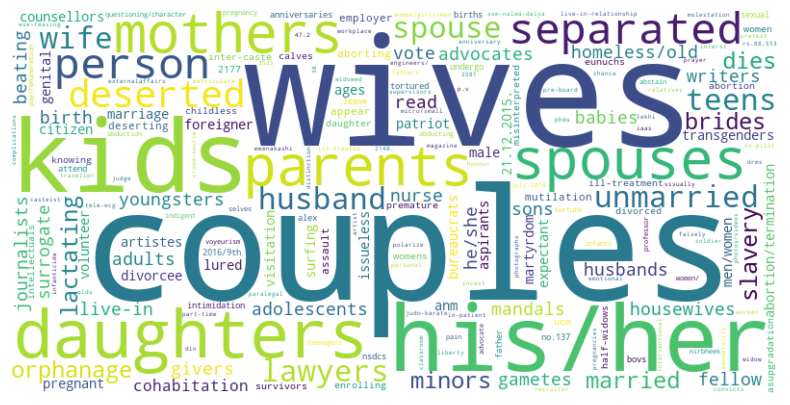

In [39]:
word_freq = {word: freq for word, freq in similar_words}
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Part 2: PSM and outcome analysis

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [ ]:
data['question_text'] = data['question_text'].apply(preprocess_text)  # Use the preprocess_text function from earlier
data['answer_text'] = data['answer_text'].apply(preprocess_text)

In [ ]:
data['woman_count'] = data['question_text'].apply(lambda x: x.count('woman')) # counting occurences per question

In [ ]:
data.head()

In [41]:
# independent variables (X) and dependent variable (y)
X = data[['ministry', 'party', 'state', 'constituency', 'constituency_type']]
y = data['gender'] == 'Female'  #  using gender to define propensity

#  categorical variables to dummy variables
X = pd.get_dummies(X)

# propensity scores
log_reg = LogisticRegression()
log_reg.fit(X, y)
data['propensity_score'] = log_reg.predict_proba(X)[:, 1]

: 